In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [6]:
df = pd.read_csv("~\\Hackathon\\ad_data_train.csv")
tdf = pd.read_csv("~\\Hackathon\\ad_data_test.csv")
df.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
1,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
2,108858,3,1,19,379,2017-11-06 15:43:45,NaN,0
3,83500,3,1,19,379,2017-11-06 15:53:43,NaN,0
4,95766,15,1,27,315,2017-11-06 16:00:00,NaN,0


In [7]:
tdf.head()

,ip,app,device,os,channel,click_time,is_attributed
0,5314,2,1,6,477,2017-11-07 11:12:19,0
1,58669,3,1,19,409,2017-11-07 11:12:19,0
2,142096,7,1,18,101,2017-11-07 11:12:19,0
3,56961,27,1,19,153,2017-11-07 11:12:19,0
4,73487,15,1,19,259,2017-11-07 11:12:19,0


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ip,770000.0,111807.103208,76343.234230,6.0,48892.5,100157.0,166118.0,364759.0
app,770000.0,19.822678,26.386921,0.0,8.0,14.0,21.0,738.0
device,770000.0,33.913383,281.769188,0.0,1.0,1.0,1.0,4206.0
os,770000.0,24.726127,59.278248,0.0,13.0,19.0,22.0,866.0
channel,770000.0,240.717874,126.470358,0.0,134.0,213.0,330.0,498.0
is_attributed,770000.0,0.415584,0.492823,0.0,0.0,0.0,1.0,1.0


In [9]:
df.drop("attributed_time",axis=1, inplace=True)

In [ ]:
import seaborn as sns
x=df.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

In [ ]:
sns.heatmap(df.corr(),cmap='plasma')

In [ ]:
#sns.pairplot(df, diag_kind='kde')

In [10]:
df.isna().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [11]:
df.dtypes

ip                int64
app               int64
device            int64
os                int64
channel           int64
click_time       object
is_attributed     int64
dtype: object

In [12]:
df.isna().sum()

ip               0
app              0
device           0
os               0
channel          0
click_time       0
is_attributed    0
dtype: int64

In [13]:
df.describe()

,ip,app,device,os,channel,is_attributed
count,770000.000000,770000.000000,770000.000000,770000.000000,770000.000000,770000.000000
mean,111807.103208,19.822678,33.913383,24.726127,240.717874,0.415584
std,76343.234230,26.386921,281.769188,59.278248,126.470358,0.492823
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48892.500000,8.000000,1.000000,13.000000,134.000000,0.000000
50%,100157.000000,14.000000,1.000000,19.000000,213.000000,0.000000
75%,166118.000000,21.000000,1.000000,22.000000,330.000000,1.000000
max,364759.000000,738.000000,4206.000000,866.000000,498.000000,1.000000


In [14]:
df.info()  # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770000 entries, 0 to 769999
Data columns (total 7 columns):
ip               770000 non-null int64
app              770000 non-null int64
device           770000 non-null int64
os               770000 non-null int64
channel          770000 non-null int64
click_time       770000 non-null object
is_attributed    770000 non-null int64
dtypes: int64(6), object(1)
memory usage: 41.1+ MB


In [15]:
def datetime_to_float(d):
    epoch = datetime.datetime.utcfromtimestamp(0)
    total_seconds =  (d - epoch).total_seconds()
    # total_seconds will be in decimals (millisecond precision)
    return total_seconds

import datetime 
df['click_date'] = pd.to_datetime(df['click_time']).dt.day
tdf['click_date'] = pd.to_datetime(tdf['click_time']).dt.day
df['click_hrs'] = pd.to_datetime(df['click_time']).dt.hour
tdf['click_hrs'] = pd.to_datetime(tdf['click_time']).dt.hour
df.drop('click_time',axis=1,inplace=True)
tdf.drop('click_time',axis=1,inplace=True)

In [16]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / obeject types. 
# The following code loops through each column and checks if the column type is object then converts those columns
# into categorical with each distinct value becoming a category or code.

for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with categorical strings
        df[feature] = pd.Categorical(df[feature]).codes # Replace strings with an integer

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770000 entries, 0 to 769999
Data columns (total 8 columns):
ip               770000 non-null int64
app              770000 non-null int64
device           770000 non-null int64
os               770000 non-null int64
channel          770000 non-null int64
is_attributed    770000 non-null int64
click_date       770000 non-null int64
click_hrs        770000 non-null int64
dtypes: int64(8)
memory usage: 47.0 MB


In [18]:
df.columns
feauture_names=['ip', 'app', 'device', 'os', 'channel','click_hrs']

In [19]:
train_char_label = ['No', 'Yes']
df_features=df[['ip', 'app', 'device', 'os', 'channel','click_date','click_hrs']]
tdf_features=tdf[['ip', 'app', 'device', 'os', 'channel','click_date','click_hrs']]

In [20]:
for col in df.columns: # ensure the count of unique values
    print ("Column {} has {} unique instances".format( col, len(df[col].unique())) )

Column ip has 185270 unique instances
Column app has 312 unique instances
Column device has 1616 unique instances
Column os has 190 unique instances
Column channel has 174 unique instances
Column is_attributed has 2 unique instances
Column click_date has 3 unique instances
Column click_hrs has 24 unique instances


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# splitting data into training and test set for independent attributes

train_set = df_features # Up to the last initial training set row
test_set =  tdf_features  # Past the last initial training set row
train_labels =  df['is_attributed']
test_labels =tdf['is_attributed']

In [23]:
print(train_set.shape)
print(test_set.shape)
print(train_labels.shape)
print(test_labels.shape)

(770000, 7)
(377787, 7)
(770000,)
(377787,)


In [24]:
# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. Other option 
# could be gini index.  Restricting the depth of the tree to 5 (no particular reason for selecting this)

#dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 5, random_state = 100)
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [25]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
dt_model.score(test_set , test_labels)

0.4521171983154529

In [27]:
# In case one wants to save the predicted values to a file...

#np.savetxt("d:\greatlakes\credit_pred.csv", y_grid , fmt='%s')


In [28]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

df_Tree_File = open('d:\df_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=df_Tree_File, feature_names = list(train_set), class_names = list(train_char_label))

df_Tree_File.close()


# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


                 Imp
ip          0.127855
app         0.341031
device      0.002857
os          0.024779
channel     0.142208
click_date  0.322953
click_hrs   0.038315


In [29]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view 
#or create a .png as below

#system("dot -Tpng D:\df_tree.dot -o D:/df_tree.png")
train_char_label = ['No', 'Yes']
df_features=df[['ip', 'app', 'device', 'os', 'channel']]
tdf_features=tdf[['ip', 'app', 'device', 'os', 'channel']]
train_set = df_features # Up to the last initial training set row
test_set =  tdf_features  # Past the last initial training set row
print(train_set.shape)
print(test_set.shape)
print(train_labels.shape)
print(test_labels.shape)

(770000, 5)
(377787, 5)
(770000,)
(377787,)


In [30]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(train_set, train_labels)
dt_model.score(test_set , test_labels)


0.8922673358268018

Regularising the Decision Tree

In [44]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5 )
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
            max_depth=5, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
dt_model.score(test_set , test_labels)

0.91870551395363

In [46]:
df_tree_regularized = open('d:\df_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= df_tree_regularized , feature_names = list(train_set), class_names = list(train_char_label))

df_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_set.columns))


              Imp
ip       0.141782
app      0.682761
device   0.000000
os       0.000000
channel  0.175457


In [51]:
from sklearn import metrics
test_pred = dt_model.predict(test_set)
cmat = metrics.confusion_matrix(np.array(test_labels), np.array(test_pred))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))

Accuracy Rate: 0.91870551395363
Misclassification Rate: 0.08129448604637005


The Confusion matrix:
 [[236927  13073]
 [ 17639 110148]]


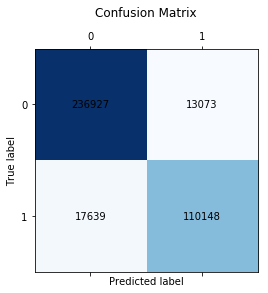

In [52]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
print("The Confusion matrix:\n", cmat)
plt.matshow(cmat, cmap = plt.cm.Blues)
plt.title("Confusion Matrix\n")
plt.ylabel('True label')
plt.xlabel('Predicted label')
for y in range(cmat.shape[0]):
    for x in range(cmat.shape[1]):
        plt.text(x, y, '{}'.format(cmat[y, x]),
                horizontalalignment = 'center',
                verticalalignment = 'center',)
plt.show()

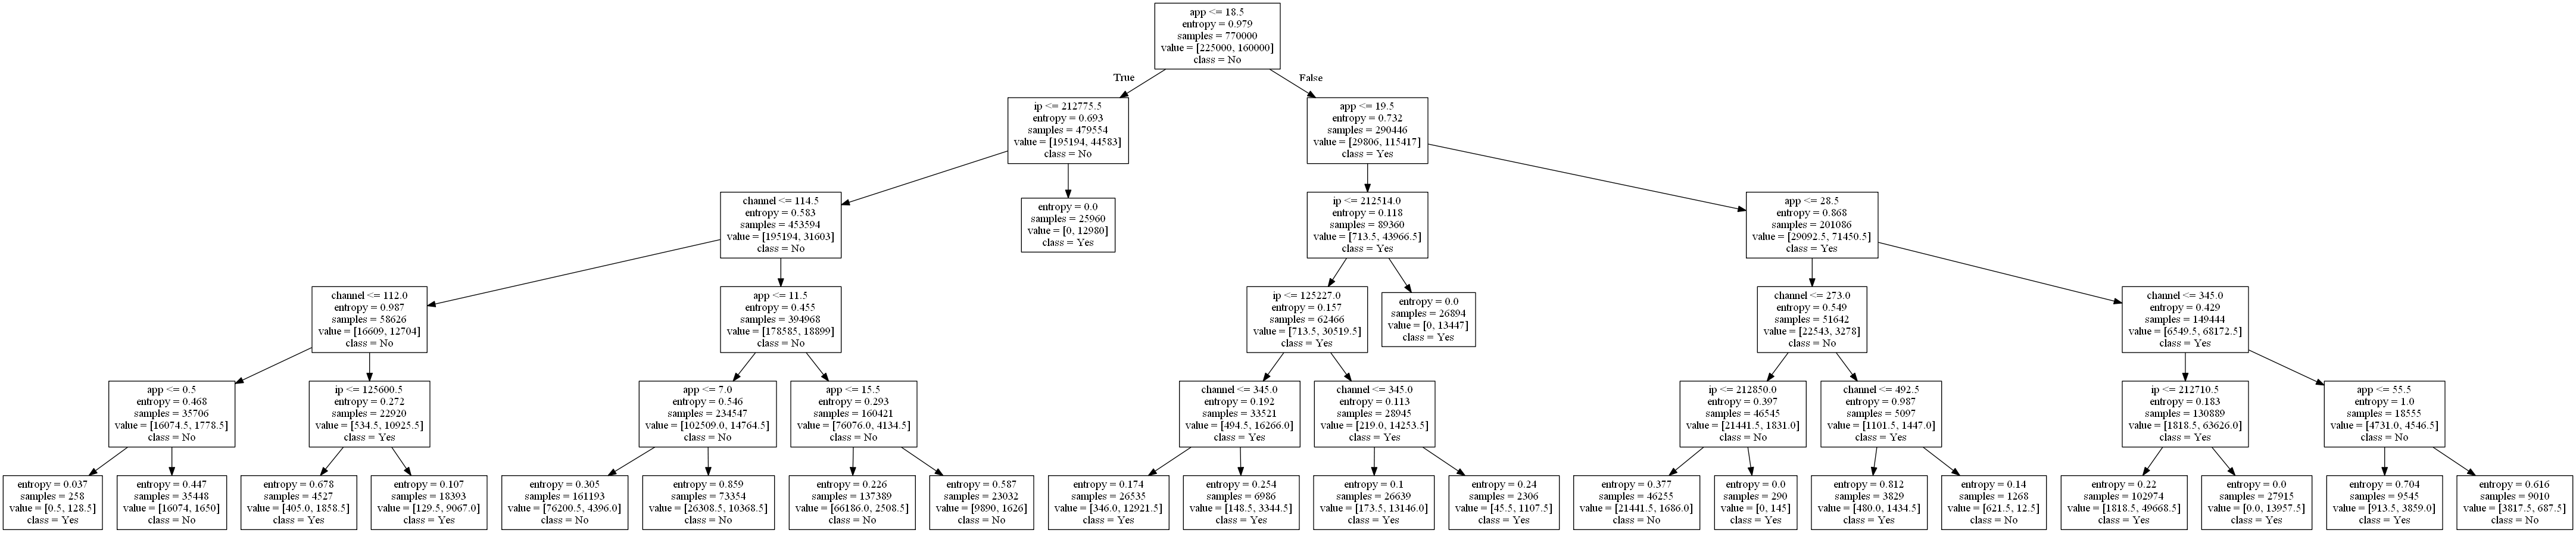

In [34]:
# You can also copy the script in the .dot file and paste it at http://webgraphviz.com/ to get tree view
# or create a .png as below
system("dot -Tpng D:\df_tree_regularized.dot -o D:/df_tree_regularized.png")
Image("d:\df_tree_regularized.png")

In [47]:
test_pred = dt_model.predict(test_set)

In [48]:
dt_model.score(test_set , test_labels)

0.91870551395363

Ensemble Learning - AdaBoosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)
#abcl = AdaBoostClassifier(n_estimators=50)
abcl = abcl.fit(train_set, train_labels)


C:\Users\sln27\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [38]:
test_pred = abcl.predict(test_set)
abcl.score(test_set , test_labels)

0.9224377757837088

Ensemble Learning - GradientBoost

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(train_set, train_labels)

In [40]:
test_pred = gbcl.predict(test_set)
gbcl.score(test_set , test_labels)

0.9213842720898284

Ensemble RandomForest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 6)
rfcl = rfcl.fit(train_set, train_labels)

In [42]:
test_pred = rfcl.predict(test_set)
rfcl.score(test_set , test_labels)

0.9070084465585104